In [1]:
# import all the necessary libraries for this project
import glob
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

First load in the data and look at the overview of it to have a general idea of the data

In [2]:
df = pd.read_csv('Datasets/movies_metadata.csv')
df.head()

/Users/simon_au/opt/anaconda3/envs/recommendationProject/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.shape

(45466, 24)

We are building a movie recommender based on the cosine similarity of the overview in each movie, thus we will need to extract the 'title' and the 'overview' columns from the dataset

In [5]:
overview_df = df[['title', 'overview']]
overview_df.head()

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [6]:
overview_df.dtypes

title       object
overview    object
dtype: object

We will drop all the duplicate rows and rows that contain null values

In [7]:
overview_df = overview_df.dropna()
overview_df = overview_df.drop_duplicates(subset=['title'])
overview_df.shape

(41371, 2)

In [8]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words='english', min_df=0)
tfidf_matrix = vectorizer.fit_transform(overview_df['overview'].values)

In [9]:
tfidf_matrix.shape

(41371, 986280)

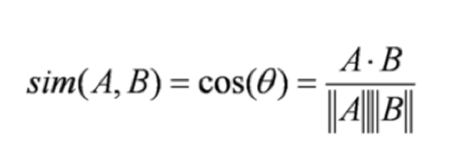


The formula for cosine similarly is above, since we are feeding the Tfidf matrix, using linear_kernel to calculate the dot product of the two would be more computationally efficent than using cosine similarly 

In [10]:
score = linear_kernel(tfidf_matrix, tfidf_matrix)

In [11]:
score.shape

(41371, 41371)

In [12]:
score[:5]

array([[1.        , 0.00564732, 0.        , ..., 0.        , 0.0024911 ,
        0.        ],
       [0.00564732, 1.        , 0.0145492 , ..., 0.01965617, 0.00783646,
        0.00306079],
       [0.        , 0.0145492 , 1.        , ..., 0.        , 0.00497884,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00349536,
        0.00556476],
       [0.        , 0.        , 0.00762136, ..., 0.        , 0.00244224,
        0.        ]])

In [13]:
overview_df.reset_index()
title = overview_df['title']
indices = pd.Series(overview_df.index, index=overview_df['title'])
overview_df.shape

(41371, 2)

In [14]:
def get_recommendations(title, score, indices):
    idx = indices[title]
    sim_scores = list(enumerate(score[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    print(len(sim_scores))
    return indices.iloc[movie_indices]

In [15]:
get_recommendations('Toy Story', score, indices)

20


title
Toy Story 2                                      2997
Toy Story 3                                     15348
The 40 Year Old Virgin                          10301
Small Fry                                       24523
Andy Hardy's Blonde Trouble                     23843
Andy Kaufman Plays Carnegie Hall                43427
Superstar: The Life and Times of Andy Warhol    38476
Andy Peters: Exclamation Mark Question Point    42721
Hot Splash                                      29202
Rebel Without a Cause                            1071
Life Begins for Andy Hardy                      27206
Wabash Avenue                                   40261
Andy Hardy's Private Secretary                  29369
Condorman                                        1932
You're Only Young Once                          26304
Welcome to Happiness                            36094
Ozzie                                           39611
Man on the Moon                                  3057
For Your Consideration

The system sucessfully recommended the other Toy Story movies as well as other comedy related movies.